# ECSE 415 Introduction to Computer Vision
## Assignment 2  : Image Features
###### Rania Ouassif 260861621

###Setup

In [4]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

#Path of directory.
path='/content/drive/My Drive/ECSE415/Assignment2/images/'
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

import cv2
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Harris Corner Detection (20 Points)


### Harris corner detector 

In [5]:
#Helper Functions

#Sobel Filter
def sobelFilter(image):
  # Finding x and y derivatives using the Sobel filter  
  Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  return (Ix, Iy)

#Square Derivatives
def squareDerivatives(Ix, Iy):
  Ix_sq = np.power(Ix, 2)
  Iy_sq = np.power(Iy, 2)
  IxIy = np.multiply(Ix,Iy)
  return (Ix_sq, Iy_sq, IxIy)

#Get cornerness function
def cornerness(ix_square, iy_square, ix_iy, k):
  return ix_square*iy_square - np.power(ix_iy,2) - k * np.power(ix_square + iy_square, 2)


def is_pixel_local_max(H, x, y):
  # check a 3x3 window centered on x, y, to see if H[x][y] is a local max
  window = H[x-1:x+2, y-1:y+2]
  # return true if no pixels have values greater than center pixel
  return (not bool((window > H[x,y]).any()))

#Non Max Supression
def nonMaximaSuppression(H):
  t = np.zeros_like(H)
  # loop through image pixels, suppressing non-local minima while leaving local minima untouched
  # we leave the border pixels untouched
  for x in range(1,H.shape[0]-1):
      for y in range(1,H.shape[1]-1):
          if is_pixel_local_max(H, x, y):
              t[x,y] = H[x,y]
          # otherwise make its value to 0
          else:
              t[x,y] = 0
  return t

In [6]:

def HarrisCornerDetector(inputImage, k, T):
  '''Harris Corner Detector
    inputImage:  Gray scale image
    k: Parameter for calculating the cornerness functions 
    T: threshold for non-maxima suppression'''
  #1. Apply gaussian filtering on the image.
  image_gauss = cv2.GaussianBlur(inputImage, (3,3), 0)

  #2. Compute image derivatives using the Sobel operator. 
  Ix, Iy = sobelFilter(image_gauss)

  #3. Compute the square of the x- and y-derivatives.
  IxSq, IySq, IxIy = squareDerivatives(Ix, Iy)

  IxSq = cv2.GaussianBlur(IxSq, (3,3), 0)
  IySq = cv2.GaussianBlur(IySq, (3,3), 0)
  IxIy = cv2.GaussianBlur(IxIy, (3,3), 0)
  #4. Compute the cornerness function response on the output of step-3. (Determinant(H)-kTrace(H)2), where k=0.05. (You can vary value of k for your application)
  H = np.zeros_like(IxSq)
  for x in range(IxSq.shape[0]):
    for y in range(IxSq.shape[1]):
      H[x,y] = cornerness(
          IxSq[x,y], IySq[x,y], IxIy[x,y], k)
  
  #5.Perform non-maxima suppression on the output of step-4 (the cornerness function ).
  H_Non_Maxixma = nonMaximaSuppression(H)

  #6. Threshold the output of the Non-maxima suppression at a user defined
  #threshold (T). Please normalize the image using cv2.normalize before
  #thresholding.
 
 # cv2.normalize()
  return np.where(H_Non_Maxixma >= T)



### Applying the Harris Corner Detector for three different images.

#### 1. Checkerboard image Figure:1(a) (Input image). Change the threshold value to get detected corners similar to Figure:1(a) (Harris Corner). Observe and report the effect of changing threshold values. Show the detected corners for at least three different threshold values (T). (3 points)

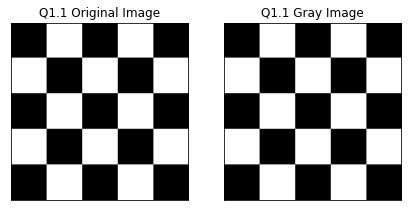

In [7]:
# load image
q1_path = path+"q1.1.jpg"
q1 = cv2.imread(q1_path) 
q1_g = cv2.cvtColor(q1, cv2.COLOR_RGB2GRAY) #convert from RGB to gray

# display images
plt.figure(figsize=(7,7))
plt.subplot(121), plt.title("Q1.1 Original Image"), plt.xticks([]), plt.yticks([])
plt.imshow(q1)
plt.subplot(122), plt.title("Q1.1 Gray Image"), plt.xticks([]), plt.yticks([])
plt.imshow(q1_g, cmap="gray")
plt.show()

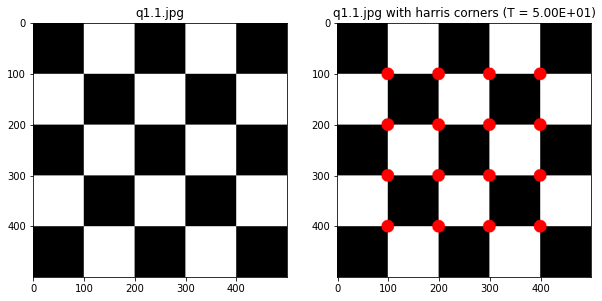

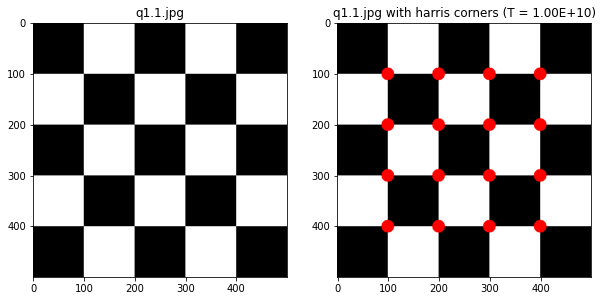

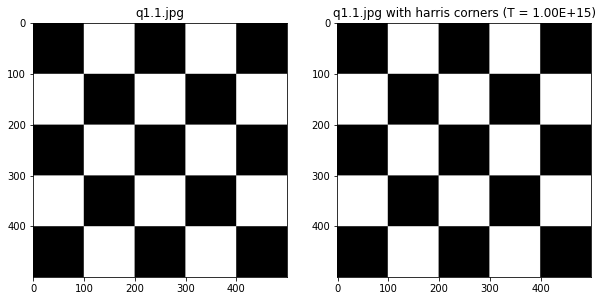

In [8]:
# Using Harris Corner Detector function with 
#three different threshold values T : 10, 1e10, 1e20
k = 0.05
for T in [50, 1e10, 1e15]:
  corner_points = HarrisCornerDetector(q1_g, k, T)

  q1_g_corners = q1.copy()
  # loop though points, draw a red circle at that point in the image
  for corner_point in zip(*corner_points[::-1]):
      cv2.circle(q1_g_corners, corner_point, 12, (255,0,0), -1)

  # display images
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(q1_g, cmap='gray')
  plt.title('q1.1.jpg')
  plt.subplot(122), plt.imshow(q1_g_corners)
  plt.title('q1.1.jpg with harris corners (T = %.2E)' % T)
  plt.show()

Observations : 

We can clearly see that varying the threshold value T varies the accuracy of the Harris corner detector. 

####2. Shape image Figure:1(b). Try different values of thresholds and report your observations. Show detected corners for at least three different threshold values. (3 points)

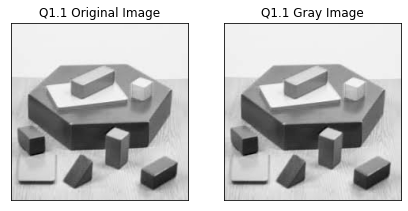

In [9]:
# load image
q2_path = path+"q1.2.png"
q2 = cv2.imread(q2_path) 
q2_g = cv2.cvtColor(q2, cv2.COLOR_RGB2GRAY) #convert from RGB to gray

# display images
plt.figure(figsize=(7,7))
plt.subplot(121), plt.title("Q1.1 Original Image"), plt.xticks([]), plt.yticks([])
plt.imshow(q2)
plt.subplot(122), plt.title("Q1.1 Gray Image"), plt.xticks([]), plt.yticks([])
plt.imshow(q2_g, cmap="gray")
plt.show()

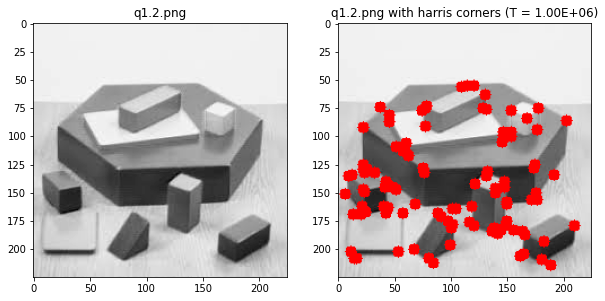

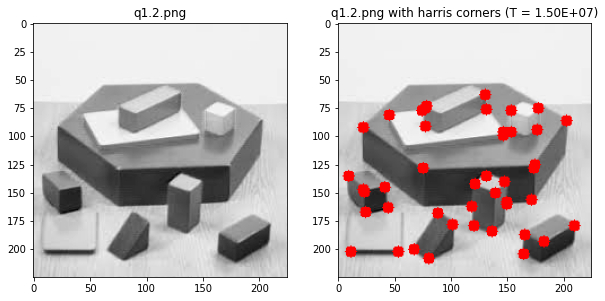

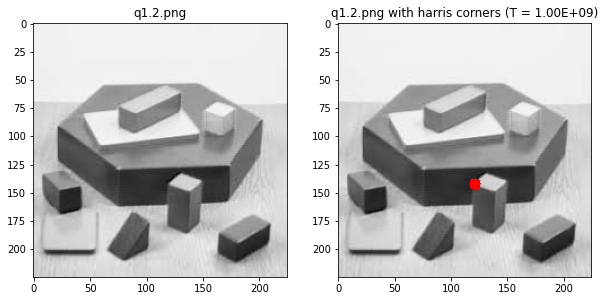

In [10]:
# Using Harris Corner Detector function with 
#three different threshold values T : 10, 1e10, 1e20
k = 0.05
for T in [1e6, 1.5e7, 1e9]:
  corner_points = HarrisCornerDetector(q2_g, k, T)

  q2_g_corners = q2.copy()
  # loop though points, draw a red circle at that point in the image
  for corner_point in zip(*corner_points[::-1]):
      cv2.circle(q2_g_corners, corner_point, 5, (255,0,0), -1)

  # display images
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(q2_g, cmap='gray')
  plt.title('q1.2.png')
  plt.subplot(122), plt.imshow(q2_g_corners)
  plt.title('q1.2.png with harris corners (T = %.2E)' % T)
  plt.show()

#### 3. House image Figure:1(c). Try different values of thresholds and report your observations. Show detected corners for at least three different threshold values. (3 points)

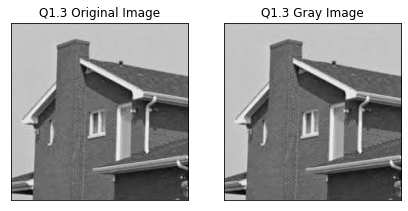

In [11]:
# load image
q3_path = path+"q1.3.png"
q3 = cv2.imread(q3_path) 
q3_g = cv2.cvtColor(q3, cv2.COLOR_RGB2GRAY) #convert from RGB to gray

# display images
plt.figure(figsize=(7,7))
plt.subplot(121), plt.title("Q1.3 Original Image"), plt.xticks([]), plt.yticks([])
plt.imshow(q3)
plt.subplot(122), plt.title("Q1.3 Gray Image"), plt.xticks([]), plt.yticks([])
plt.imshow(q3_g, cmap="gray")
plt.show()

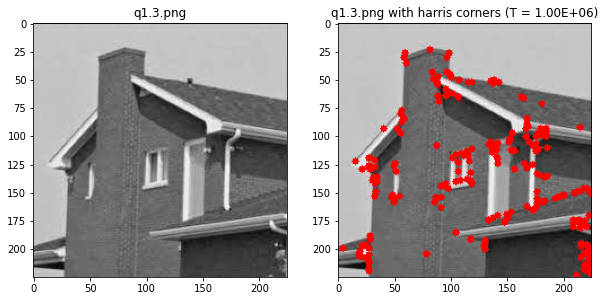

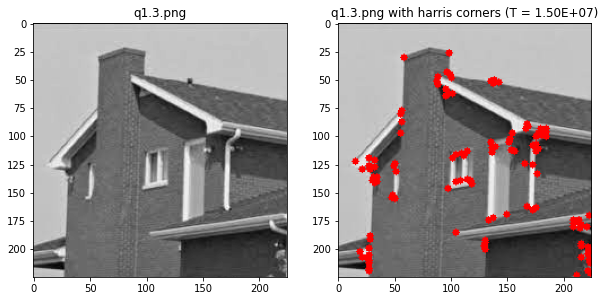

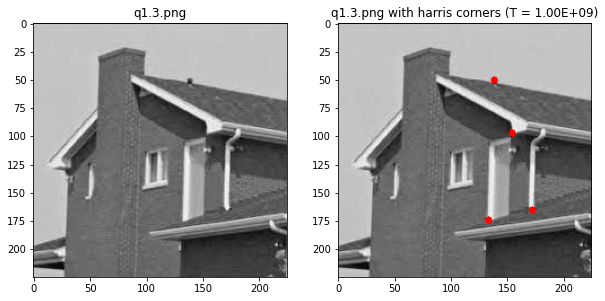

In [12]:
# Using Harris Corner Detector function with 
#three different threshold values T : 10, 1e10, 1e20
k = 0.05
for T in [1e6, 1.5e7, 1e9]:
  corner_points = HarrisCornerDetector(q3_g, k, T)

  q3_g_corners = q3.copy()
  # loop though points, draw a red circle at that point in the image
  for corner_point in zip(*corner_points[::-1]):
      cv2.circle(q3_g_corners, corner_point, 3, (255,0,0), -1)

  # display images
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(q3_g, cmap='gray')
  plt.title('q1.3.png')
  plt.subplot(122), plt.imshow(q3_g_corners)
  plt.title('q1.3.png with harris corners (T = %.2E)' % T)
  plt.show()

## 2. Invariance of SIFT Features (28 Points)

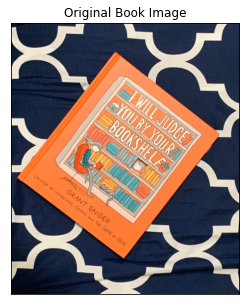

In [13]:
#Image Book Path
bookPath = cv2.imread(path + 'book.png')
book = cv2.cvtColor(bookPath, cv2.COLOR_BGR2RGB) #Convert image to RGB format

plt.figure(figsize=(5,5))
plt.title("Original Book Image"), plt.xticks([]), plt.yticks([])
plt.imshow(book)

###2.1 Invariance under scale

#### 1. Compute SIFT keypoints for the reference image. (2p)

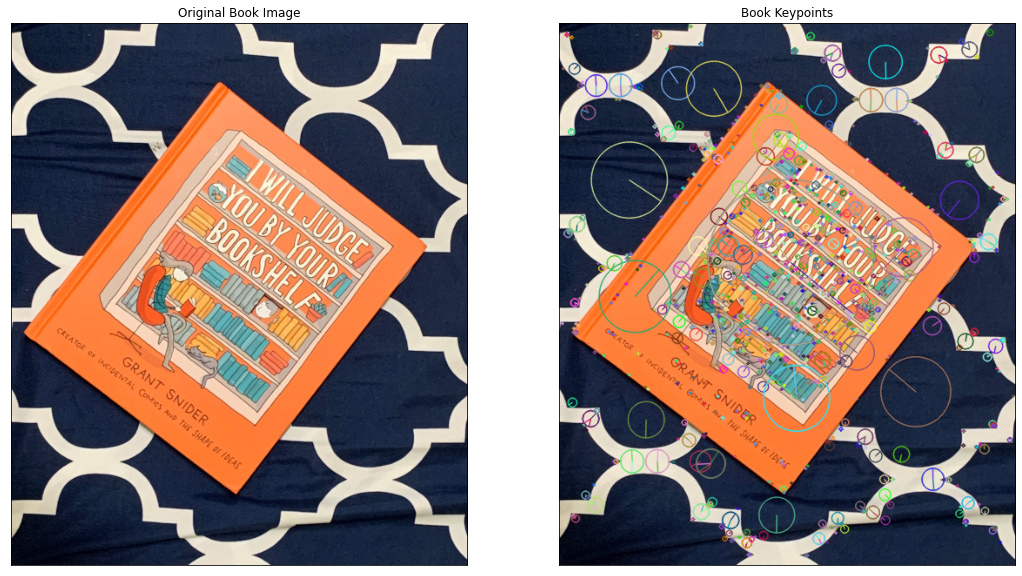

In [14]:
#From tutorial #4
CopyBook = book.copy()

#create sift object
sift = cv2.xfeatures2d.SIFT_create()
bookKP = sift.detect(book, None)#detecting sift keypoints

cv2.drawKeypoints(book, bookKP, CopyBook, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(18,27))
plt.subplot(121), plt.title("Original Book Image"), plt.xticks([]), plt.yticks([])
plt.imshow(book)
plt.subplot(122), plt.title("Book Keypoints"), plt.xticks([]), plt.yticks([])
plt.imshow(CopyBook)
plt.show()

#### 2. Scale the reference image using scaling factors of (0.2, 0.8, 2, 5). This should result in a total of 4 different transformed images. Display scaled images. (1pt)

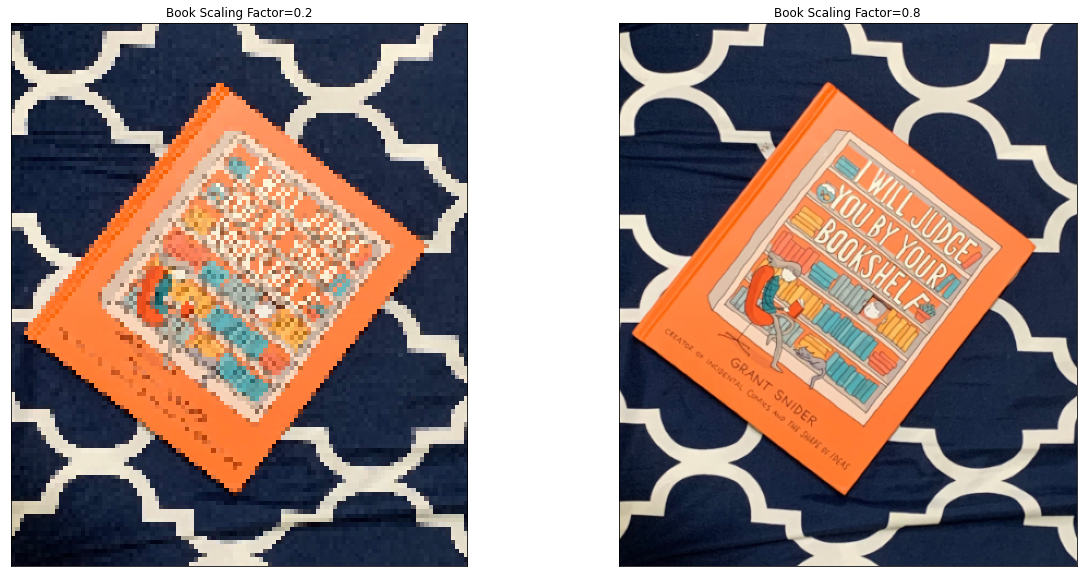

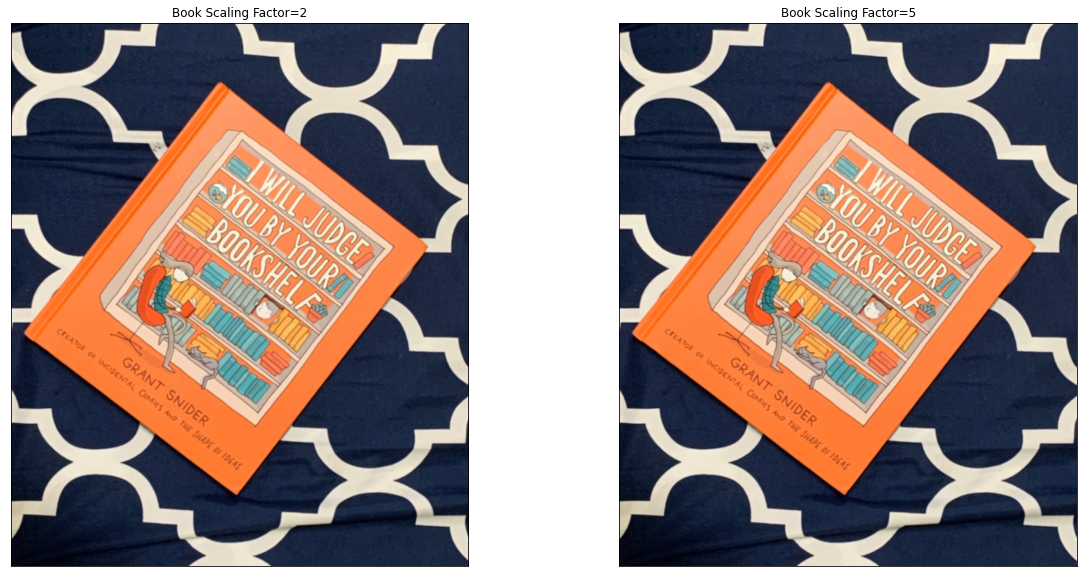

In [15]:
book_copy = book.copy()
scalingFactors = [0.2, 0.8, 2, 5]
bookH, bookW = book.shape[:2]
scaledImages = []
for i in range(len(scalingFactors)):
  img = cv2.resize(book_copy, (0,0), fx=scalingFactors[i], fy=scalingFactors[i])
  scaledImages.append(img)# Scaling the book image and appending it to an array
idx = 121
plt.figure(figsize=(20,10))
for i in range(4):
  if idx == 123:
    plt.show()
    idx = 121 
    plt.figure(figsize=(20,10))
    plt.subplot(idx), plt.title("Book Scaling Factor=" + str(scalingFactors[i])), plt.xticks([]), plt.yticks([])
    plt.imshow(scaledImages[i])
    idx = idx+1
  else:
    plt.subplot(idx), plt.title("Book Scaling Factor=" + str(scalingFactors[i])), plt.xticks([]), plt.yticks([])
    plt.imshow(scaledImages[i])
    idx = idx+1
plt.show()

####3. Compute SIFT keypoints for all (total 4) transformed images. (2 pts)

In [ ]:
scaledSiftImages = []
for i in range(4):
  Copy_Image = scaledImages[i].copy()
  KP = sift.detect(scaledImages[i], None)
  cv2.drawKeypoints(scaledImages[i], KP, Copy_Image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  scaledSiftImages.append(Copy_Image)# computing the sift keypoints of the scaled images


for i in range(4):
  plt.figure(figsize=(18,27))
  plt.subplot(121), plt.title("Book Scaling Factor=" + str(scalingFactors[i])), plt.xticks([]), plt.yticks([])
  plt.imshow(scaledImages[i])
  plt.subplot(122), plt.title("Book Scaling Factor=" + str(scalingFactors[i]) + " with Key Features"), plt.xticks([]), plt.yticks([])
  plt.imshow(scaledSiftImages[i])
  plt.show()

####4. Match all keypoints of the reference image to the transformed images using a brute-force method (by examining all the possible pairs of keypoint matches). (2 pts)

In [ ]:
CopyBook = book.copy()
OriginalKP, Originaldesc = sift.detectAndCompute(CopyBook, None)
bookScaledMatches = []
Scaled_listKP = []
bf = cv2.BFMatcher()

# Matching sift KPs using a brute-force method
for i in range(4):
  ScaledKP, Scaleddesc = sift.detectAndCompute(scaledImages[i], None)
  Scaled_listKP.append(ScaledKP)
  matches = bf.match(Originaldesc, Scaleddesc)
  bookScaledMatches.append(matches)

#### 5. Sort the matching keypoints according to the matching distance. (2pts)

In [ ]:
bookscaleMatches_Sorted = []

# sorting all the mathing Kps considering the distance
for i in range(4):
  m = bookScaledMatches[i]
  m = sorted(m, key=lambda x:x.distance)
  bookscaleMatches_Sorted.append(m)

####6. Plot the matching distance for the top 100 matched keypoints. Plot indices of keypoints on the x-axis and corresponding matching distance on the yaxis. (2 pts)

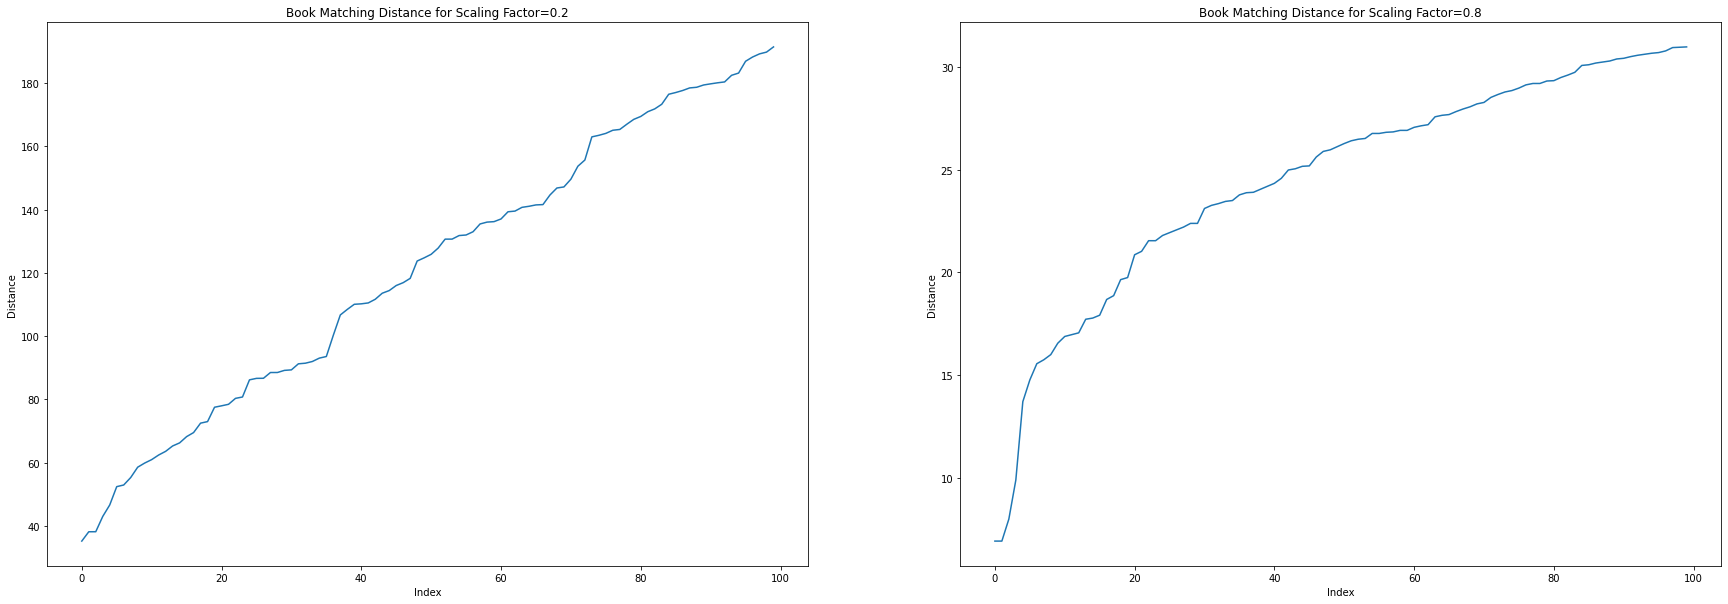

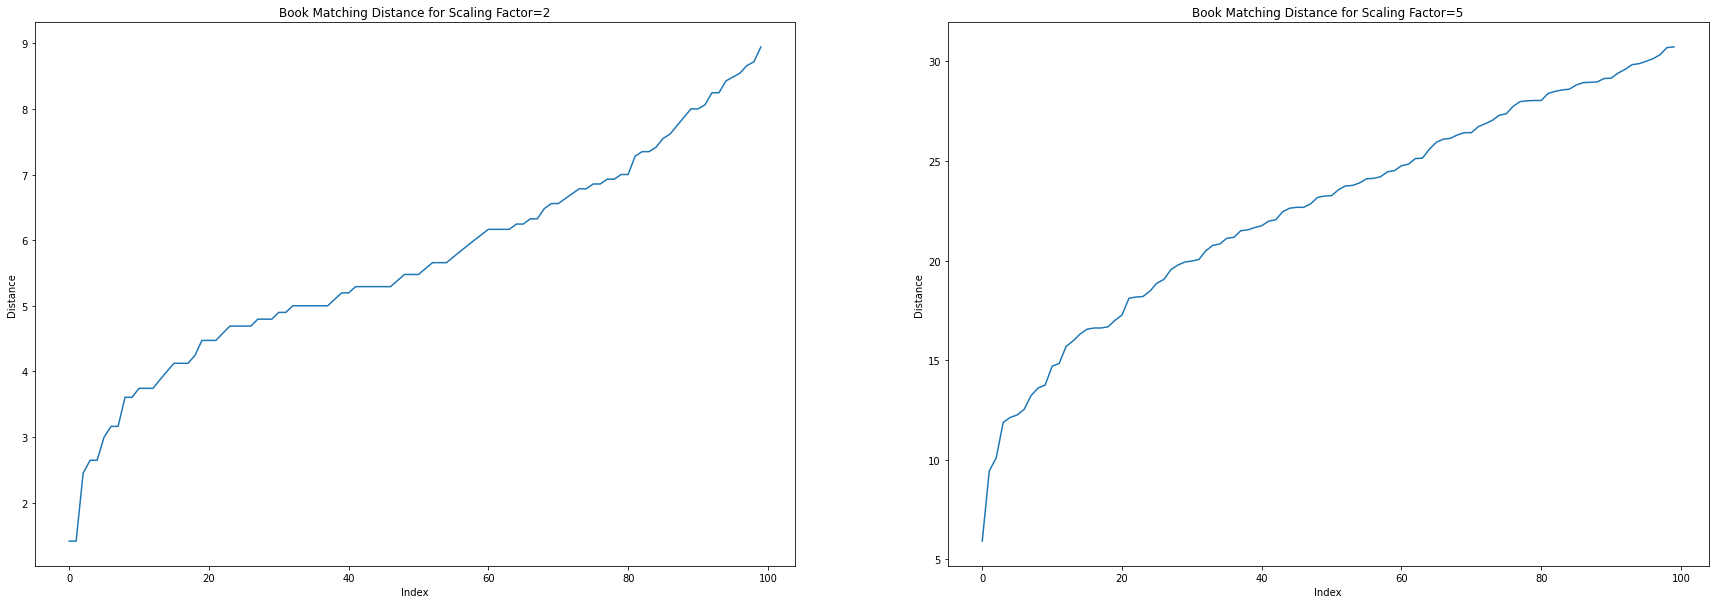

<Figure size 2160x720 with 0 Axes>

In [ ]:
idxScaledArray = []
dScaledArray = []

for i in range(4):
  m = bookscaleMatches_Sorted[i]
  idx = []
  d = []
  for i in range(100):
    d.append(m[i].distance)
    idx.append(i)
  idxScaledArray.append(idx)
  dScaledArray.append(d)

plot=121
plt.figure(figsize=(30,10))
for i in range(4):
  plt.subplot(plot), plt.title("Book Matching Distance for Scaling Factor=" + str(scalingFactors[i])) 
  plt.plot(idxScaledArray[i], dScaledArray[i])
  plt.xlabel('Index')
  plt.ylabel('Distance')
  if plot==122:
    plt.show()
    plot=121
    plt.figure(figsize=(30,10))
  else:
    plot = plot+1 
plt.show()


#### 7. Display the top ten matched keypoints for each pair of the reference image and a transformed image (the top matches are the ones with the smallest match distances). (2 pts)

In [ ]:
scaledMatchesOutput = []

for i in range(4):
  m = bookscaleMatches_Sorted[i]
  output = cv2.drawMatches(CopyBook, OriginalKP, scaledImages[i], Scaled_listKP[i], m[:10], None, flags=2)
  plt.figure(figsize=(15,30))
  plt.title("Book Matches with Scaling Factor=" + str(scalingFactors[i])), plt.xticks([]), plt.yticks([])
  plt.imshow(output)
  scaledMatchesOutput.append(output)

####8. Discuss the trend in the plotted results. What is the effect of increasing the scale on the matching distance? Reason as to the cause. (1 points)

We can observe that the matching distance increases with worse matches, i.e., for the 100th match of each plot,has the greatest distance, which is normal because they have been sorted.
We can see that the highest distance is obtained with the 0.2x scaled image, then with the 0.8x, then the 2x and the lowest is obtained with the 2x scaled.

I believe that this is the case because the more an image is scaled, the more information is lost in the image. That is, the further away the scaling is from 1x, the more the images are different from the original and thus the greater the distances of the matches.

###2.2 Invariance Under Rotation

#### 1. Compute the SIFT keypoints for the reference image. (2 points)

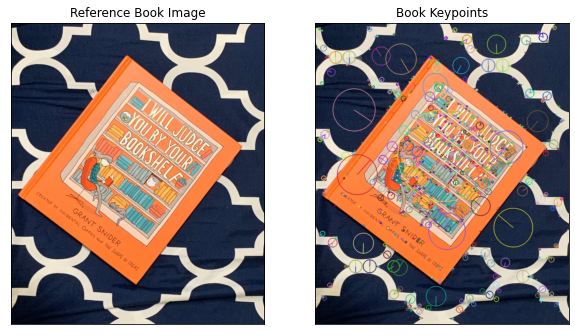

In [ ]:
CopyBook = book.copy()
bookKP = sift.detect(book, None)

#Drawing KPs
cv2.drawKeypoints(book, bookKP, CopyBook, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,18))
plt.subplot(121), plt.title("Reference Book Image"), plt.xticks([]), plt.yticks([])
plt.imshow(book)
plt.subplot(122), plt.title("Book Keypoints"), plt.xticks([]), plt.yticks([])
plt.imshow(CopyBook)
plt.show()

#### 2. Rotate the reference image at the angles of (10, 90, 130, 180). Display the rotated images. (1 pt)

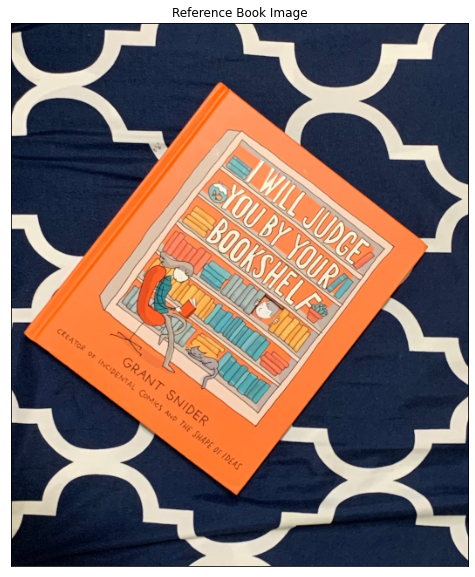

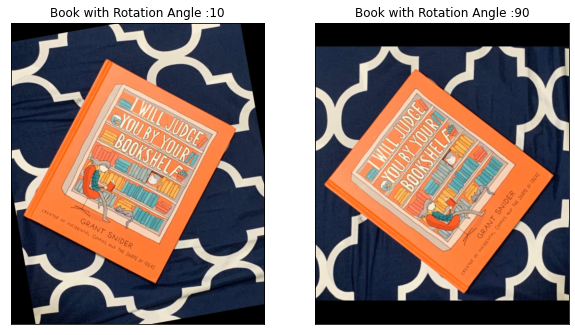

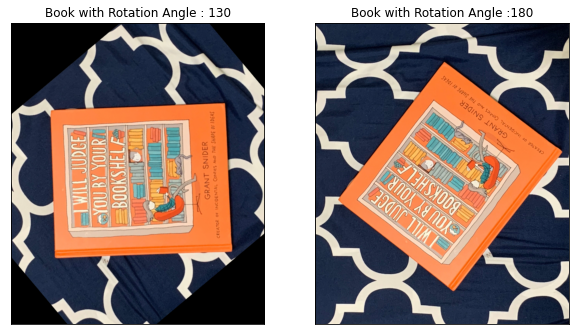

In [ ]:
angles = [10, 90, 130, 180] #storing angles as array

rotatedImages = []
for i in range(len(angles)):
  rotation_Matrix = cv2.getRotationMatrix2D((bookW/2, bookH/2), angles[i], 1)
  rotatedImage = cv2.warpAffine(book, rotation_Matrix, (bookW, bookH))
  rotatedImages.append(rotatedImage)# rotate the book image and apprend to array
plt.figure(figsize=(10,10))
plt.title("Reference Book Image"), plt.xticks([]), plt.yticks([])
plt.imshow(book)


#Displaying the rotated images
idx = 121
plt.figure(figsize=(10,10))
for i in range(len(angles)):
  if idx == 123:
    plt.show()
    idx = 121
    plt.figure(figsize=(10,10))
    plt.subplot(idx), plt.title("Book with Rotation Angle : " + str(angles[i])), plt.xticks([]), plt.yticks([])
    plt.imshow(rotatedImages[i])
    idx = idx+1
  else:
    plt.subplot(idx), plt.title("Book with Rotation Angle :" + str(angles[i])), plt.xticks([]), plt.yticks([])
    plt.imshow(rotatedImages[i])
    idx = idx+1
plt.show()

####3. Compute the SIFT keypoints for all (total of 4) transformed images. (2 pts)

In [ ]:
rotatedSIFTimages = []

#computing the sift KPs of the roatated image
for i in range(len(angles)):
  copyImage = rotatedImages[i].copy()
  KPs = sift.detect(rotatedImages[i], None)
  cv2.drawKeypoints(rotatedImages[i], KPs, copyImage, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  rotatedSIFTimages.append(copyImage)

for i in range(len(angles)):
  plt.figure(figsize=(18,27))
  plt.subplot(121), plt.title("Book with Rotation Angle : " + str(angles[i])), plt.xticks([]), plt.yticks([])
  plt.imshow(rotatedImages[i])
  plt.subplot(122), plt.title("Book with Rotational Angle : " + str(angles[i]) + " with Key features"), plt.xticks([]), plt.yticks([])
  plt.imshow(rotatedSIFTimages[i])
  plt.show()

#### 4. Match all keypoints of the reference image to the transformed images using a brute-force method. (2 pts)

In [ ]:
AngleListKP = []
bookAnglesMatches = []
CopyBook = book.copy()

OriginalKP, Originaldesc = sift.detectAndCompute(CopyBook, None)
for i in range(4):
  AngleKP, Angledesc = sift.detectAndCompute(rotatedImages[i], None)
  AngleListKP.append(AngleKP)
  m = bf.match(Originaldesc, Angledesc)
  bookAnglesMatches.append(m)# matching the KPs using a brute force method.


#### 5. Sort the matching keypoints according to the matching distance. (2pts)

In [ ]:
SortedAnglesBM = []

# Sorting the KPs according to the matching  distance
for i in range(4):
  m = bookAnglesMatches[i]
  m = sorted(m, key=lambda x:x.distance)
  SortedAnglesBM.append(m)

####6. Display the top ten matched keypoints for each pair of the reference image and a transformed image. (2 pts)

In [ ]:
angleMatchesOutput = []

for i in range(4):
  m = SortedAnglesBM[i]
  output_Image = cv2.drawMatches(CopyBook, OriginalKP, rotatedImages[i], AngleListKP[i], m[:10], None, flags=2)
  plt.figure(figsize=(12,20))
  plt.title("Book Matches with Rotation Angle : " + str(angles[i])), plt.xticks([]), plt.yticks([])
  plt.imshow(output_Image)
  angleMatchesOutput.append(output_Image)

####7. Plot the matching distance for the top 100 matched keypoints. Plot the indices of keypoints on the x-axis and the corresponding matching distance on the yaxis. (2 pts)

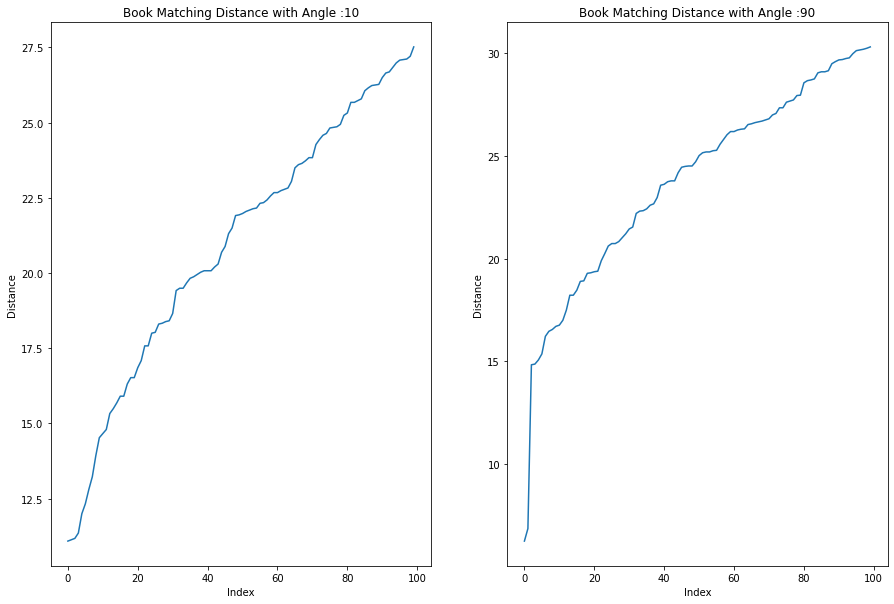

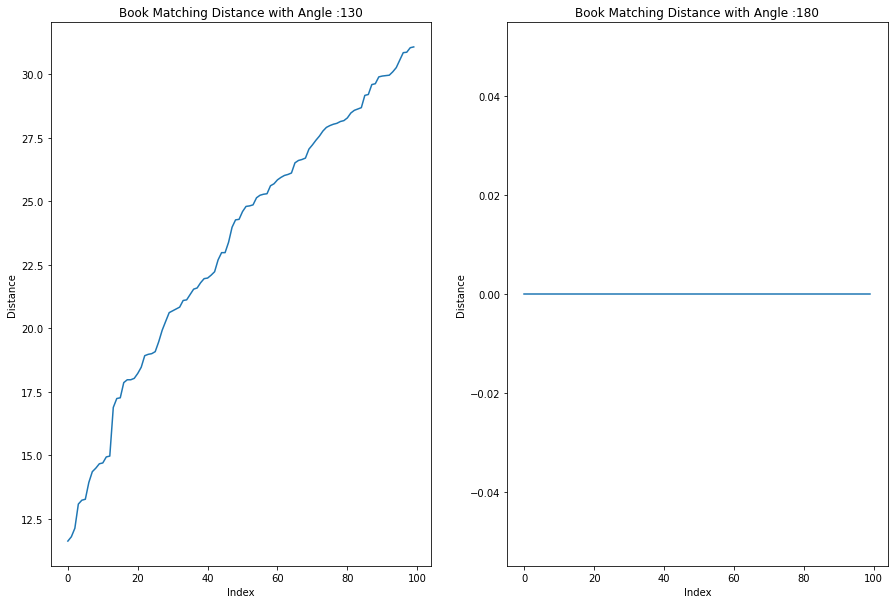

<Figure size 1080x720 with 0 Axes>

<function matplotlib.pyplot.show>

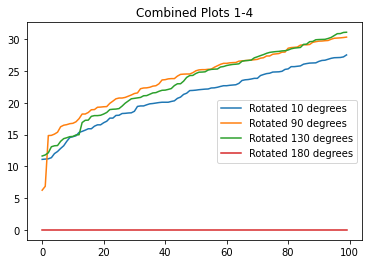

In [ ]:
dRotatedArray = []
idxRotatedArray = []

for i in range(4):
  idx = []
  m = SortedAnglesBM[i]
  d = []
  for i in range(100):
    d.append(m[i].distance)
    idx.append(i)
  idxRotatedArray.append(idx)
  dRotatedArray.append(d)

j=121
plt.figure(figsize=(15,10))
for i in range(4):
  plt.subplot(j), plt.title("Book Matching Distance with Angle :" + str(angles[i]))
  plt.plot(idxRotatedArray[i], dRotatedArray[i])
  plt.xlabel('Index')
  plt.ylabel('Distance')
  if j==122:
    plt.show()
    j=121
    plt.figure(figsize=(15,10))
  else:
    j = j+1
plt.show()

plt.plot(dRotatedArray[0], label="Rotated 10 degrees")
plt.plot(dRotatedArray[1], label="Rotated 90 degrees")
plt.plot(dRotatedArray[2], label="Rotated 130 degrees")
plt.plot(dRotatedArray[3], label="Rotated 180 degrees")
plt.title("Combined Plots 1-4")
plt.legend()
plt.show

####8. Discuss the trend in the plotted results. What is the effect of increasing the angle of rotation on the matching distance? Reason as to the cause. (1 pts)

We can observe from question 7 plots that as the rotation angle increases, the matched keypoints are further apart. Then, when the rotation angle gets closer to 180 deg, the opposite scenario happens, i.e., the matched keypoints gets closer. This is because of the fact than when it reaches 180 deg, the images are the same, which is confirmed by the plotting "Book Matching distance with angle 180", and hence it is easier to find good matches.

Thus, I believe that this is because when the image is rotated, some information can be lost depending on the angle of rotation. For example, with the 10 degrees rotation, the image is only slightly rotated. It has more information in common with the reference image, and it has a lower distance. Then, due to the cropping with higher angle rotation values, some of the information is lost (for example with the 90 or 130 degrees rotation).Finally, as stated before, with the 180 degree rotated image, there is no increase, i.e., the descriptors are all the same as the original image. This is because no information is lost and the SIFT descriptors normalize for orientation.

## 3. Image Stitching (40 Points)

###1. Compute the SIFT keypoints and corresponding descriptors for images 1 and 2. (2 points)

NameError: ignored

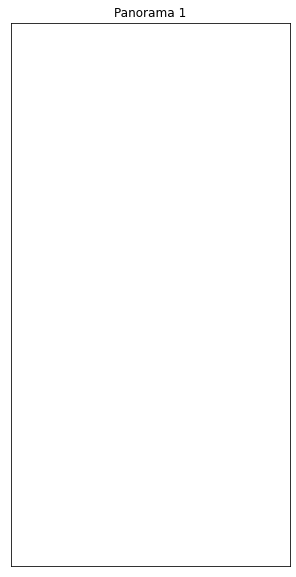

In [ ]:
#Load Images
pan1Path = path + 'panorama1.png'
pan1 = cv2.imread(pan1Path)

pan2Path = path + 'panorama2.png'
pan2 = cv2.imread(pan2Path)

pan3Path = path + 'panorama3.png'
pan3 = cv2.imread(pan3Path)

#Display Images
plt.figure(figsize=(5,10))
plt.title("Panorama 1"), plt.xticks([]), plt.yticks([])
plt.imshow(to_rgb(pan1))

plt.figure(figsize=(5,10))
plt.title("Panorama 2"), plt.xticks([]), plt.yticks([])
plt.imshow(to_rgb(pan2))

plt.figure(figsize=(5,10))
plt.title("Panorama 3"), plt.xticks([]), plt.yticks([])
plt.imshow(to_rgb(pan3))

In [ ]:
#Function for getting the keypoints and the descriptors
def getKPSandDescriptors(inputImage):
  '''Gets the keypoints and descriptors
  inputImage: image
  '''
  sift = cv2.xfeatures2d.SIFT_create()
  KPS = sift.detect(inputImage, None)
  KPS, descriptors = sift.compute(inputImage, KPS)
  return (KPS, descriptors)

def to_rgb(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

In [ ]:
KPs1, descriptors1 = getKPSandDescriptors(pan1)# getting the KPS and descriptors for images panorama 1 and panorama 2

KPs2, descriptors2 = getKPSandDescriptors(pan2)

pan1_KPS = pan1.copy()
cv2.drawKeypoints( pan1, KPs1, pan1_KPS,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)# draw descriptors onto images for pan1

pan2_KPS = pan2.copy()
cv2.drawKeypoints(pan2, KPs2, pan2_KPS,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)# draw descriptors onto images for pan1

# display outputs
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(to_rgb(pan1))
plt.title('Reference Panorama 1 ')
plt.subplot(122), plt.imshow(to_rgb(pan2))
plt.title('Reference Panorama 2 ')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(to_rgb(pan1_KPS))
plt.title('Panorama 1 with keypoints')
plt.subplot(122), plt.imshow(to_rgb(pan2_KPS))
plt.title('Panorama 2 with keypoints')
plt.show()

###2. Find matching keypoints in images 1 and 2 and display the 20 best pairs. (5 points)

In [ ]:
bf = cv2.BFMatcher() # cv2's brute-force matcher
matches = bf.match(descriptors1, descriptors2)# match descriptors found in previous question

matches = sorted(matches, key = lambda x:x.distance)# sorting matches by distance .
pan12_matches = cv2.drawMatches(
    pan1, KPs1, pan2, KPs2,
    matches[:20], None, flags=2) # drawing the first 20 matches

plt.figure(figsize=(20,20))
plt.imshow(to_rgb(pan12_matches))
plt.title('Matched keypoints between Panorama1 and Panorama2')
plt.show()

###3. Find the homography that best matches the keypoints from image 1 and 2 using the RANSAC method, and apply the resulting transformation to image 1. Image 2 should not be transformed. (5 points)

In [ ]:
height, width, _ = pan1.shape #height and width of both panorama images

# pad panorama2
pan2_pad = cv2.copyMakeBorder(
    pan2, height//2, height//2 + 1, width, width, cv2.BORDER_CONSTANT, None, 0) # padding panorama2 so the homography of panorama1 onto panorama2
KPs1, descriptors1 = getKPSandDescriptors(pan1)
KPs2, descriptors2 = getKPSandDescriptors(pan2_pad)

bf = cv2.BFMatcher() #compute matches
matches = bf.match(descriptors1, descriptors2)

# filtering for good matches
goodMatches = [j for j in matches if j.distance < 1000]

pts1 = np.zeros((len(goodMatches), 2), dtype=np.float32)# empty arrays to store the coordinates of goodMatches
pts2 = np.zeros((len(goodMatches), 2), dtype=np.float32)

for i, match in enumerate(goodMatches):
  pts1[i, :] = KPs1[match.queryIdx].pt
  pts2[i, :] = KPs2[match.trainIdx].pt

H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC) # computes the homography from pan1 onto pan2


pan1Transformed = cv2.warpPerspective(
    pan1, H, (width*3, height*2)) # applying homography to pan1

# display output
plt.figure(figsize=(20,20))
plt.imshow(to_rgb(pan2_pad))
plt.title('Panorama 2 with padding')
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(to_rgb(pan1Transformed))
plt.title('Panorama 1 transformed by H')
plt.show()

###4. Stitch the transformed image 1 and the original image 2 together using linear image blending. Let us call this image 12. Display this image. (5 pts)

In [ ]:
# stitching the transformed panorama 1 imange with the panorama 2 image
# by using linear image blending
windowSize = 100
startTransition = width

weightImage1 = np.concatenate(
    (np.ones(startTransition), 
    np.linspace(1, 0, windowSize),
    np.zeros(3*width - startTransition - windowSize)), axis=0)
pan1blended = np.empty_like(pan1Transformed)
pan2blended = np.empty_like(pan1Transformed)
image12 = np.empty_like(pan1Transformed)

for i in range(3):
  pan1blended[:, :, i] = pan1Transformed[:, :, i] * weightImage1
  pan2blended[:, :, i] = pan2_pad[:, :, i] * (1-weightImage1)
  image12[:, :, i] = np.add(
      pan1blended[:, :, i], pan2blended[:, :, i])

# display outputs
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(to_rgb(pan1blended))
plt.title('Transformed and blended Panorama1 before stitching')
plt.subplot(122), plt.imshow(to_rgb(pan2blended))
plt.title('Blended Panorama2 before stitching')
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(to_rgb(image12))
plt.title('Transformed Panorama1 stiched with Panorama2')
plt.show()


image12_withoutPad = image12[420:1210, 400:2000, :]

plt.figure(figsize=(20,20))
plt.imshow(to_rgb(image12_withoutPad))
plt.title('Image 12 without Padding')
plt.show()

###5. Compute the SIFT keypoints and corresponding descriptors for images 12 and 3. (2 points)

In [ ]:
KPs12, descriptors12 = getKPSandDescriptors(image12)# getting keypoints and descriptors for images image12 and panorama3
KPs3, descriptors3 = getKPSandDescriptors(pan3)
image12_KPS = image12.copy()
cv2.drawKeypoints(
    image12, KPs12, image12_KPS,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)# draw descriptors onto images


pan3_KPS = pan3.copy()
cv2.drawKeypoints(
    pan3, KPs3, pan3_KPS,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display output images 12 and panorama 3
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(to_rgb(image12))
plt.title('Image 12')
plt.subplot(122), plt.imshow(to_rgb(pan3))
plt.title('Panorama 3 Reference Image')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(to_rgb(image12_KPS))
plt.title('Image 12 with keypoints')
plt.subplot(122), plt.imshow(to_rgb(pan3_KPS))
plt.title('Panorama 3 with keypoints')
plt.show()

### 6. Find the matching keypoints in 12 and 3 images and display the 20 best pairs. (4 points)

In [ ]:
bf = cv2.BFMatcher() # cv2's bf-force matcher
matches = bf.match(descriptors12, descriptors3)# match descriptors found in previous question

matches = sorted(matches, key = lambda x:x.distance)# sorting matches by distance .

pan12_3_matches = cv2.drawMatches(
    image12, KPs12, pan3, KPs3,
    matches[:20], None, flags=2) # drawing the first 20 matches

plt.figure(figsize=(20,20))
plt.imshow(to_rgb(pan12_3_matches))
plt.title('Matched keypoints between Image 12 and Panorama3')
plt.show()

###7. Compute the homography using the RANSAC method. Apply the transformation to image 3. Image 12 should not be transformed. (5 points)

In [ ]:
#As seen inthe tutorials
gMatches = [m for m in matches if m.distance < 1000] # filtering for all the good matches

pts3 = np.zeros((len(gMatches), 2), dtype=np.float32) # create empty arrays 
pts12 = np.zeros((len(gMatches), 2), dtype=np.float32)
for i, match in enumerate(gMatches):
  pts12[i, :] = KPs12[match.queryIdx].pt
  pts3[i, :] = KPs3[match.trainIdx].pt

# compute homography from panorama3 image  to image 12 
H, _ = cv2.findHomography(pts3, pts12, cv2.RANSAC)

pan3Transformed = cv2.warpPerspective(
    pan3, H, (width*3, height*2))# apply homography to panorama3
# display output images 
plt.figure(figsize=(20,20))
plt.imshow(to_rgb(image12))
plt.title('Image with padding')
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(to_rgb(pan3Transformed))
plt.title('Panorama 3 transformed by H')
plt.show()

###8. Stitch the transformed image 3 and image 12 together using linear image blending. Display the resulting image. (5 points)

In [ ]:
# stitching the transformed image panorama3 with panorama image 12  using the  linear image blending
start = 1000
sizeWindow = 2000

wImg12 = np.concatenate(
    (np.ones(start), 
    np.linspace(1, 0, sizeWindow),
    np.zeros(3*width - start - sizeWindow)), axis=0)

image12_blended = np.empty_like(image12)

pan3_blended = np.empty_like(image12)
pan_12_3 = np.empty_like(image12)
for i in range(3):
  image12_blended[:, :, i] = image12[:, :, i] * wImg12
  pan3_blended[:, :, i] = pan3Transformed[:, :, i] * (1-wImg12)
  pan_12_3[:, :, i] = np.add(
      image12_blended[:, :, i], pan3_blended[:, :, i])

# display results
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(to_rgb(image12_blended))
plt.title('Blended Image 12 before stitching')
plt.subplot(122), plt.imshow(to_rgb(pan3_blended))
plt.title('Tranformed and blended Panorama 3 before stitching')
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(to_rgb(pan_12_3))
plt.title('Image 12 stiched with transformed Panorama 3')
plt.show()



### 9. Discuss: Note that we could also use multiband blending in the section 4,8. When should one prefer pyramid blending over linear blending? (5pts)

We should prefer to use pyramid blending over linear blending in the case where the two images are from different scenes with a lighting change for example. 
However , when we want to blend two images that are from the same picture for example, where the lighting is approximately the same, linear blending can be used, as in this assignment. 

## 4. Image Matching (14 Points)

###Using SIFT features show which (if any) of the three objects shown on the left are present in the image on right? (example is from Lowe 1999)

In [ ]:
#Image Scene Path
scenePath = cv2.imread(path + 'q4.png')
scene = cv2.cvtColor(scenePath, cv2.COLOR_BGR2RGB) #Convering image to RGB format

plt.figure(figsize=(5,5))
plt.title("Scene Image"), plt.xticks([]), plt.yticks([])
plt.imshow(scene)

#Box1 Path
box1Path = cv2.imread(path + 'q4_1.png')
box1 = cv2.cvtColor(box1Path, cv2.COLOR_BGR2RGB) #Convert image to RGB format

plt.figure(figsize=(5,5))
plt.title("Box 1 Image"), plt.xticks([]), plt.yticks([])
plt.imshow(box1)

#Box2 Path
box2Path = cv2.imread(path + 'q4_2.png')
box2 = cv2.cvtColor(box2Path, cv2.COLOR_BGR2RGB) #Convert image to RGB format

plt.figure(figsize=(5,5))
plt.title("Box 2 Image"), plt.xticks([]), plt.yticks([])
plt.imshow(box2)

#Box3 Path
box3Path = cv2.imread(path + 'q4_3.png')
box3 = cv2.cvtColor(box3Path, cv2.COLOR_BGR2RGB) #Convert image to RGB format

plt.figure(figsize=(5,5))
plt.title("Box 3 Image"), plt.xticks([]), plt.yticks([])
plt.imshow(box3)


In [ ]:
#create sift object
sift = cv2.xfeatures2d.SIFT_create()

#detect sift keypoints
sceneKP = sift.detect(scene, None)
CopyScene = scene.copy()
cv2.drawKeypoints(scene, sceneKP, CopyScene, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(18,27))
plt.subplot(121), plt.title("Original Scene Image"), plt.xticks([]), plt.yticks([])
plt.imshow(scene)
plt.subplot(122), plt.title("Scene Keypoints"), plt.xticks([]), plt.yticks([])
plt.imshow(CopyScene)
plt.show()

#detect sift keypoints
box1KP = sift.detect(box1, None)
CopyBox1 = box1.copy()
cv2.drawKeypoints(box1, box1KP, CopyBox1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Original Box1 Image"), plt.xticks([]), plt.yticks([])
plt.imshow(box1)
plt.subplot(122), plt.title("Box1 Keypoints"), plt.xticks([]), plt.yticks([])
plt.imshow(CopyBox1)
plt.show()

#detect sift keypoints
box2KP = sift.detect(box2, None)
CopyBox2 = box2.copy()
cv2.drawKeypoints(box2, box2KP, CopyBox2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Original Box2 Image"), plt.xticks([]), plt.yticks([])
plt.imshow(box2)
plt.subplot(122), plt.title("Box2 Keypoints"), plt.xticks([]), plt.yticks([])
plt.imshow(CopyBox2)
plt.show()



#detect sift keypoints
box3KP = sift.detect(box3, None)
CopyBox3 = box3.copy()
cv2.drawKeypoints(box3, box3KP, CopyBox3, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Original Box3 Image"), plt.xticks([]), plt.yticks([])
plt.imshow(box3)
plt.subplot(122), plt.title("Box3 Keypoints"), plt.xticks([]), plt.yticks([])
plt.imshow(CopyBox3)
plt.show()


In [ ]:
scene_copy = scene.copy()

keypoints_scene, descriptor_scene = sift.detectAndCompute(scene, None)
cv2.drawKeypoints(scene,keypoints_scene,scene_copy,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# detect SIFT features and compute SIFT descriptors
keypoints_box1, descriptor_box1 = sift.detectAndCompute(box1, None)
keypoints_box2, descriptor_box2 = sift.detectAndCompute(box2, None)
keypoints_box3, descriptor_box3 = sift.detectAndCompute(box3, None)

brute_force = cv2.BFMatcher()
#Match descriptors
match_box1 = brute_force.match(descriptor_scene,descriptor_box1)
match_box2 = brute_force.match(descriptor_scene,descriptor_box1)
match_box3 = brute_force.match(descriptor_scene,descriptor_box1)

match_box1 = sorted(match_box1, key = lambda x:x.distance)
match_box2 = sorted(match_box2, key = lambda x:x.distance)
match_box3 = sorted(match_box3, key = lambda x:x.distance)


draw_match_box1 = cv2.drawMatches(scene,keypoints_scene, box1, keypoints_box1, match_box1[:10], None, flags=2)
draw_match_box2 = cv2.drawMatches(scene,keypoints_scene,box2, keypoints_box2, match_box2[:4], None, flags=2) #only 4 matches 
draw_match_box3 = cv2.drawMatches(scene,keypoints_scene,CopyBox3, keypoints_box3, match_box3[:4], None, flags=2) #only 4 matches

# display matching for box1
plt.figure(figsize=(10,10))
plt.imshow(draw_match_box1)
plt.title("Matches for box 1"), plt.xticks([]), plt.yticks([])
plt.show()


# display matching for box2
plt.figure(figsize=(10,10))
plt.imshow(draw_match_box2)
plt.title("Matches for box 2"), plt.xticks([]), plt.yticks([])
plt.show()


# display matching for box3
plt.figure(figsize=(10,10))
plt.imshow(draw_match_box3)
plt.title("Matches for box3"), plt.xticks([]), plt.yticks([])
plt.show()

We can see that using the SIFT features, only the first object was detected. We can indeed see that out of the 10 matches, only 2 were "incorrect", i.e., they were not matching the actual object in the scene. 
For the second object (box2), only 1 matched the actual object in the scene. And finally for the third object, the SIFT features do not show that the third object is present in the scene. 

Thus, the SIFT features only show 1 object (box1) present in the scene.
The same cannot be infered using SSD as SSD is used when we divide the images into smaller portions to see whether the image we need is in the bigger image. 

